Pedro Ivo Vasconcelos - TP

## **Capítulo 5**

1) Critério de Jury a formula da planta: $$G(z) = \frac{0.6177}{z - 0.7770}$$

Usando a fórmula $$1 + KG(z) = 0$$
E aplicando a planta G(z) a fórmula:
$$1 + K\frac{0.6177}{z - 0.7770}$$
E rearranjando a equação:
$$z=0.7770−K(0.6177)$$
E os valores de K que satisfazem essa condição de magnitude para ser estável
 dentro do raio unitário:
$$∣0.7770−K(0.6177)∣<1$$
Para garantir que o sistema em malha fechada seja estável, o valor do ganho
K deve estar na faixa:
$$−0.36<K<2.88$$

2) Realizando os cálculos:

$$G(jw) = \frac{0.6177}{jw - 0.777}$$
$$1 + K * \frac{0.6177}{z + 0.777} = 0$$
$$K*\frac{0.6177}{z + 0.777} = -1$$
$$z - 0.777 = -k * 0.6177$$
$$z - 0.777 + k*0.6177 = 0$$
Para K=1:
$$F(z) = z - 0.1593 = 0$$
$$P1 = 0.1593$$
$$F(z) = \frac{G(z)}{1 + G(z)} = \frac{0,6177}{z – 0,1593}$$
Para K = 3:
$$F(z) = \frac{KG(z)}{1 + KG(z)}$$
$$F(z) = \frac{3G(z)}{1+3G(z)} = \frac{1,8531}{z + 1,0761}$$

No caso de K=3 o "círculo" envolve o ponto -1 como se pode ver no Diagrama de Nyquist, e por conta disso o sistema se torna instável:


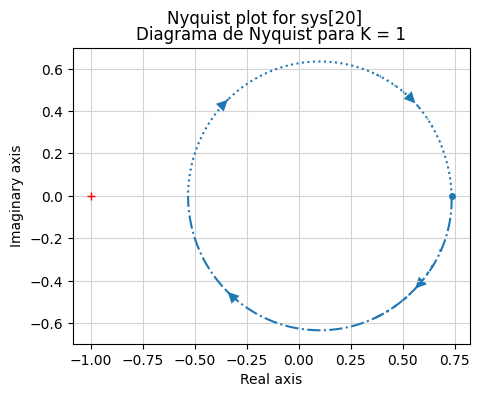

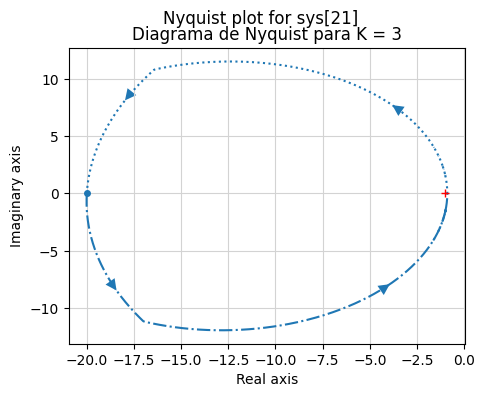

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
# −0.36<K<2.88
#num = [0.6177]
#den = [1, -0.7770]
#Ganhos k
k1 = 1
k3 = 3

#Funções de transferência
num1 = [0.6177]
den1 = [1, -0.1593]
num3 = [1.8531]
den3 = [1, -1.0761]
Gz1 = ctl.TransferFunction(num1, den1, True)
Gz3 = ctl.TransferFunction(num3, den3, True)

new_figsize = (6.4 * 0.8, 4.8 * 0.8)

plt.figure(figsize=new_figsize)
ctl.nyquist_plot(Gz1)
plt.title('Diagrama de Nyquist para K = 1')
plt.show()

plt.figure(figsize=new_figsize)
ctl.nyquist_plot(Gz3)
plt.title('Diagrama de Nyquist para K = 3')
plt.show()

3) Bode: O valor não possui a margem de fase desejada, ao saturar
 em -180º a partir da amostragem o sistema se mostra incapaz de
 ultrapassar a zona instável.

 ->Margem de ganho e margem de fase como chegar na resposta, encontre o K de 60 de MF
 -> limite de z ->1 de 1+kG(z)

<img alt="Diagrama de Bode" src="anexos\c5e3 Diagrama de Bode.png" title="Diagrama de Bode">


In [5]:
import numpy as np
import control.matlab as control

# Definindo a função de transferência G(z) para K=1 (pode ajustar K conforme necessário)
K = 1  # Ajuste este valor para verificar diferentes margens de fase
num = [0.6177 * K]
den = [1, -0.7770]
Gz = control.tf(num, den, 1)  # O terceiro argumento é o tempo de amostragem T

# Calculando a margem de ganho e de fase
margins = control.margin(Gz)
gm, pm, wg, wp = margins[:4]  # Ajustado para extrair corretamente os valores

# Convertendo a margem de fase de radianos para graus
pm_deg = np.degrees(pm)

print(f"Margem de fase para K={K}: {pm_deg} graus")

# Se necessário, ajuste K para tentar chegar perto de 60 graus

Margem de fase para K=1: 5206.955600630356 graus


4) Nichols:

Grafico errado, nichols é um funil

<img alt="Nichols" src="anexos\c5e4 Nichols.png" title="Nichols">


In [ ]:

plt.figure()
ctl.nichols_plot(Gz)
plt.show()

In [ ]:

plt.figure()
ctl.nichols_plot(Gz)
plt.show()

5) Lugar das Raízes: O valor se mostra coerente, pois a linha está sobre um número ímpar do somatório de pólos e zeros.


<img alt="Lugar das Raízes" src="anexos\c5e1 Root Locus.png" title="Lugar das Raízes">

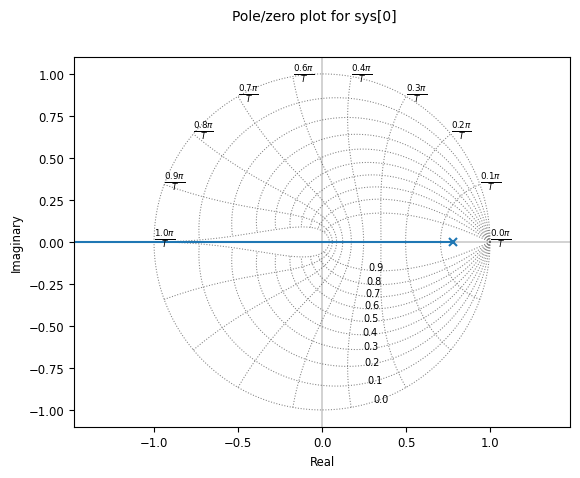

In [3]:
plt.figure()
ctl.root_locus(Gz)
plt.show()

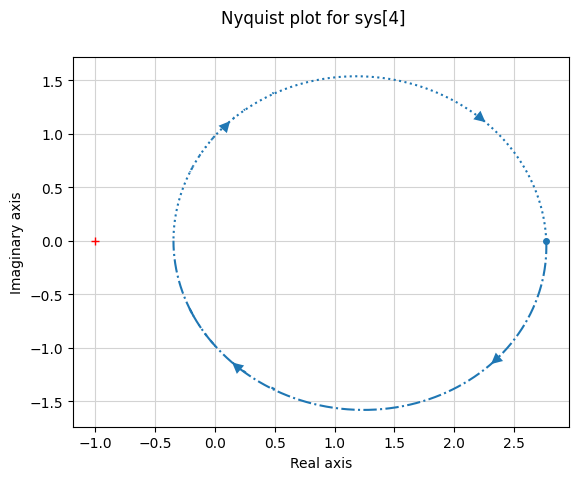

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

num = [0.6177]
den = [1, -0.7770]
Gz = ctl.TransferFunction(num, den, True)

# −0.36<K<2.88

# Ts = 1
# Gs = ctl.sample_system(Gz, Ts, method='tustin')

# plt.figure()
# ctl.nichols_plot(Gz)
# plt.show()

plt.figure()
ctl.nyquist_plot(Gz)
plt.show()

# ESTAVEL POR NAO CIRCULAR -1



3) Bode: O valor não possui a margem de fase desejada, ao saturar
 em -180º a partir da amostragem o sistema se mostra incapaz de
 ultrapassar a zona instável.

In [ ]:
plt.figure()
ctl.bode_plot(Gs)
plt.show()

4) Nichols:

In [2]:
plt.figure()
ctl.nichols_plot(Gs)
plt.show()

NameError: name 'ctl' is not defined

<Figure size 640x480 with 0 Axes>

5) Lugar das Raízes: O valor se mostra coerente, pois a linha está sobre um número ímpar do somatório de pólos e zeros.

In [ ]:
plt.figure()
ctl.rlocus(Gz)
plt.show()